# Assignment-2 | Part-2 | Question-2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Gridworld dimensions
grid_size = 5

# Discount factor
gamma = 0.95

# exploration factor
epsilon=0.9

# Initialize the value function
V = np.zeros((grid_size, grid_size))

# Define the actions
actions = ['up', 'down', 'left', 'right']
action_probs = [0.25, 0.25, 0.25, 0.25]

# Define the special states and their effects
special_states = {
    (0, 1): (4, 2, 5),
    (0, 4): [(4, 4, 2.5, 0.5), (4, 2, 2.5, 0.5)]
}

# Returen next S' and R(t+1) once St and At is given
def get_next_state_and_reward(state, action):
    if state in special_states:
        if state == (0, 4):
            next_state = special_states[state][np.random.choice([0, 1], p=[0.5, 0.5])]
            return (next_state[0], next_state[1]), next_state[2]
        return special_states[state][:2], special_states[state][2]

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size - 1)

    # reward is -0.2 for normal stps, -0.5 for attempts to step off the grid
    reward = 0
    if (x, y) == state:  # Attempt to step off the grid
        reward = -0.5
    elif (x,y)== [4, 0]:
        reward = 0      # Terminal points
    elif (x,y)== [2, 4]:
        reward = 0      # Terminal points
    else:
        reward = -0.2   # Normal step
    return (x, y), reward

# Random starting except terminal points
def Random_start():
    while True:
        start=(random.randint(0,4),random.randint(0,4))
        if(start!=(4,0) and start!=(2,4)):
            return start

# generate total episode        
def generate_episode(start):
    episode = []
    state = start
    while True:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(4,0) or state==(2,4):
            break
    return episode

# choose action on soft policy
def choose_action(state, policy):
        action_probabilities = list(policy[state].values())
        actions = list(policy[state].keys())
        return np.random.choice(actions, p=action_probabilities)

# generate total episode for epsilon soft       
def generate_episode_soft(start,policy):
    episode = []
    state = start
    while True:
        action = choose_action(state,policy)
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(4,0) or state==(2,4):
            break
    return episode

# Function to return more than one optimal action if you have same value for two actions
def action_search(sv):
    max_value=max(sv)
    max_indices = [i for i, x in enumerate(sv) if x == max_value]
    # print(max_indices)
    d1=d2=d3=d4=''
    for k in max_indices:
        if k==0:
            d1="up "
        elif k==1:
            d2="Down "
        elif k==2:
            d3="Left "
        elif k==3:
            d4="Right "
    return(d1+d2+d3+d4)


In [9]:
# Function to plot the gridworld
def plot_gridworld(policy,Title):
    grid_size = 5
    fig, ax = plt.subplots(figsize=(8, 8))

    rect1 = plt.Rectangle((0.5,-0.5), 1, 1, facecolor='blue', edgecolor='black')
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((3.5,-0.5), 1, 1, facecolor='green', edgecolor='black')
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((1.5,3.5), 1, 1, facecolor='red', edgecolor='black')
    ax.add_patch(rect3)
    rect4 = plt.Rectangle((3.5,3.5), 1, 1, facecolor='yellow', edgecolor='black')
    ax.add_patch(rect4)
    rect5 = plt.Rectangle((-0.5,3.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect5)
    rect6 = plt.Rectangle((3.5,1.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect6)

    for i in range(grid_size):
        for j in range(grid_size):
            # ax.text(j, i, round(policy[i,j],2), ha='center', va='center', fontsize=8)
            ax.text(j, i, policy[i,j], ha='center', va='center', fontsize=8)

    
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both')
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.title(Title)
    plt.gca().invert_yaxis()
    plt.show()

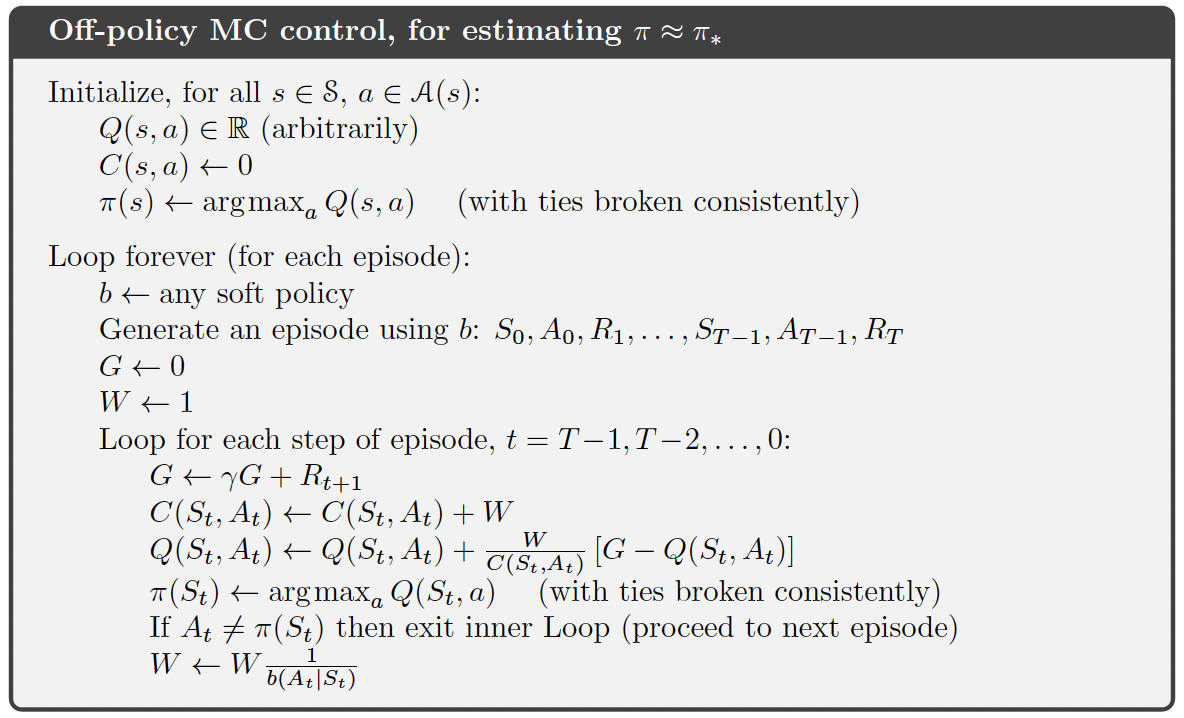

Episodes: 100%|██████████| 10000000/10000000 [05:39<00:00, 29463.29it/s]


{(0, 0): {'up': 3.4881237499999997, 'down': 3.398717562499999, 'left': 3.4881237499999997, 'right': 4.1980249999999995}, (0, 1): {'up': 4.6295, 'down': 4.6295, 'left': 4.6295, 'right': 4.6295}, (0, 2): {'up': 3.4881237499999997, 'down': -3, 'left': 4.1980249999999995, 'right': 1.53187375}, (0, 3): {'up': 2.7253487999999995, 'down': -0.5705, 'left': 3.7881237499999987, 'right': 1.8230250000000003}, (0, 4): {'up': 2.1295, 'down': 2.1295, 'left': 2.1295, 'right': 2.1295}, (1, 0): {'up': 3.7881237499999987, 'down': 3.028781684374999, 'left': 3.098717562499999, 'right': 3.7881237499999987}, (1, 1): {'up': 4.1980249999999995, 'down': -3, 'left': 3.398717562499999, 'right': -3}, (1, 2): {'up': 3.7881237499999987, 'down': -3, 'left': 3.7881237499999987, 'right': 2.973408119999999}, (1, 3): {'up': 1.53187375, 'down': -0.39000000000000007, 'left': 3.398717562499999, 'right': 1.5315537754592365}, (1, 4): {'up': 1.8230250000000003, 'down': -0.20000000000000007, 'left': -0.5705, 'right': 1.23126948

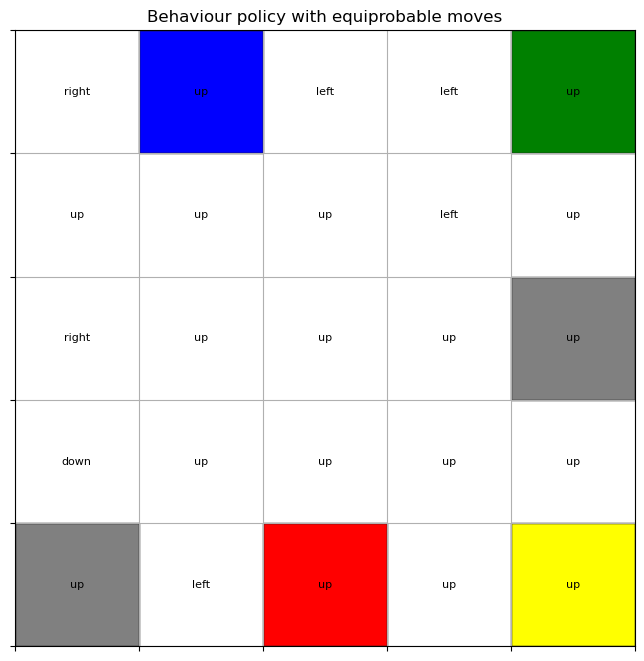

In [17]:
# Off policy MC control
np.random.seed(200)
# Initialize
Q={}
C={}
returns={}
b_policy={}
policy={}
for y in range(grid_size):
    for x in range(grid_size):
        state = (y, x)
        returns[state] = {a: [] for a in actions}
        Q[state] = {a: -3 for a in actions}     #-3 is used to get quick convergence
        C[state] = {a: 0 for a in actions}
        b_policy[state] = random.choice(actions)
        policy[state] = max(Q[state], key=Q[state].get)

# Loop forever (for each episode)
for _ in tqdm(range(10000000), desc="Episodes"):
    start=Random_start()
    episodes=generate_episode(start) #Genarate episode with equiprobable moves (soft policy)
    G=0
    W=1
    for state, action, reward in reversed(episodes):
        G = gamma * G + reward
        C[state][action] += W
        Q[state][action] += (W/C[state][action]) * (G - Q[state][action])
        policy[state] = max(Q[state], key=Q[state].get)
        if action != policy[state]:
            break
        W = W/0.25 #since bahavior policy is equiprobable

print(Q)
print(policy)

# Plot optimum policy            
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = policy[x, y]
plot_gridworld(OA,"Behaviour policy with equiprobable moves")